In [1]:
%load_ext autoreload
%autoreload 2

import traceback
from util import *

from han_SA_myalgorithm import algorithm



In [31]:
timelimit = 60
result=[]
problem_files=[f"stage/STAGE1_{i}.json" for i in range(1, 19)]+["alg_test_problems_20240429/TEST_K50_1.json", "alg_test_problems_20240429/TEST_K50_2.json", "alg_test_problems_20240429/TEST_K100_1.json","alg_test_problems_20240429/TEST_K100_2.json", "alg_test_problems_20240429/TEST_K200_1.json", "alg_test_problems_20240429/TEST_K200_2.json"]
for problem_file in problem_files:
    with open(problem_file, 'r') as f:
        prob = json.load(f)

    K = prob['K']

    ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
    ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

    DIST = np.array(prob['DIST'])
    for r in ALL_RIDERS:
        r.T = np.round(DIST/r.speed + r.service_time)

    alg_start_time = time.time()

    exception = None

    solution = None
    try:
        # Run algorithm!
        solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
    except Exception as e:
        exception = f'{e}'
        print(traceback.format_exc())


    alg_end_time = time.time()

    with open(problem_file, 'r') as f:
        prob = json.load(f)

    K = prob['K']

    ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
    ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

    DIST = np.array(prob['DIST'])
    for r in ALL_RIDERS:
        r.T = np.round(DIST/r.speed + r.service_time)

    checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

    checked_solution['time'] = alg_end_time - alg_start_time
    checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
    checked_solution['exception'] = exception

    checked_solution['prob_name'] = prob['name']
    checked_solution['prob_file'] = problem_file

    result.append(checked_solution['avg_cost'])
    print(f"{problem_file}: {checked_solution['avg_cost']}")

SA start
stage/STAGE1_1.json: 3756.2439999999983
SA start
stage/STAGE1_2.json: 3361.6380000000004
SA start
stage/STAGE1_3.json: 3115.4639999999995
SA start
stage/STAGE1_4.json: 2748.513499999999
SA start
stage/STAGE1_5.json: 2327.527333333333
SA start
stage/STAGE1_6.json: 2551.4459999999995
SA start
stage/STAGE1_7.json: 3496.626
SA start
stage/STAGE1_8.json: 3302.952
SA start
stage/STAGE1_9.json: 3102.519
SA start
stage/STAGE1_10.json: 2627.7160000000003
SA start
stage/STAGE1_11.json: 2527.451666666668
SA start
stage/STAGE1_12.json: 2568.6096666666667
SA start
stage/STAGE1_13.json: 5101.34
SA start
stage/STAGE1_14.json: 4247.218
SA start
stage/STAGE1_15.json: 4424.512999999999
SA start
stage/STAGE1_16.json: 3366.0725
SA start
stage/STAGE1_17.json: 3590.3440000000005
SA start
stage/STAGE1_18.json: 3651.0350000000008
SA start
alg_test_problems_20240429/TEST_K50_1.json: 3584.4119999999994
SA start
alg_test_problems_20240429/TEST_K50_2.json: 4112.732
SA start
alg_test_problems_20240429/TES

In [32]:
import pandas as pd
df=pd.DataFrame(result, index=(range(1,25)))
df

,0
1,3756.244000
2,3361.638000
3,3115.464000
4,2748.513500
5,2327.527333
6,2551.446000
7,3496.626000
8,3302.952000
9,3102.519000
10,2627.716000


In [34]:
df.sum()

0    81279.503167
dtype: float64

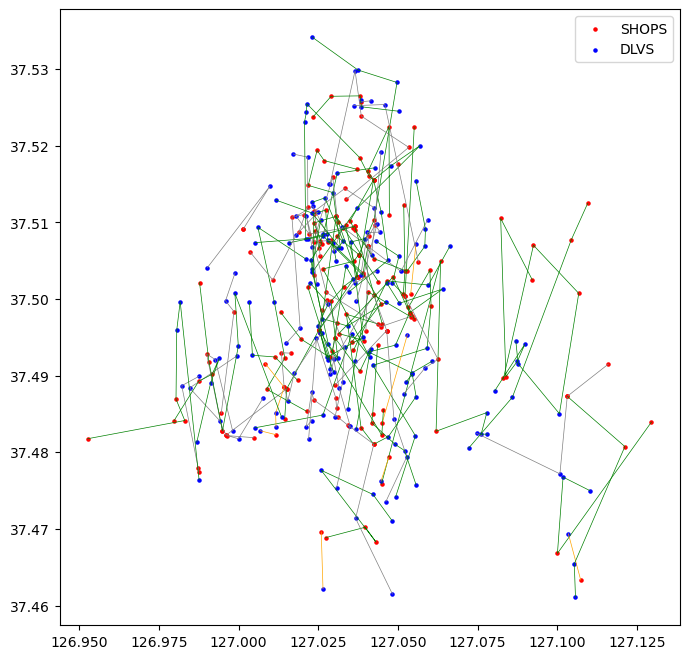

In [26]:
draw_route_solution(ALL_ORDERS, checked_solution)

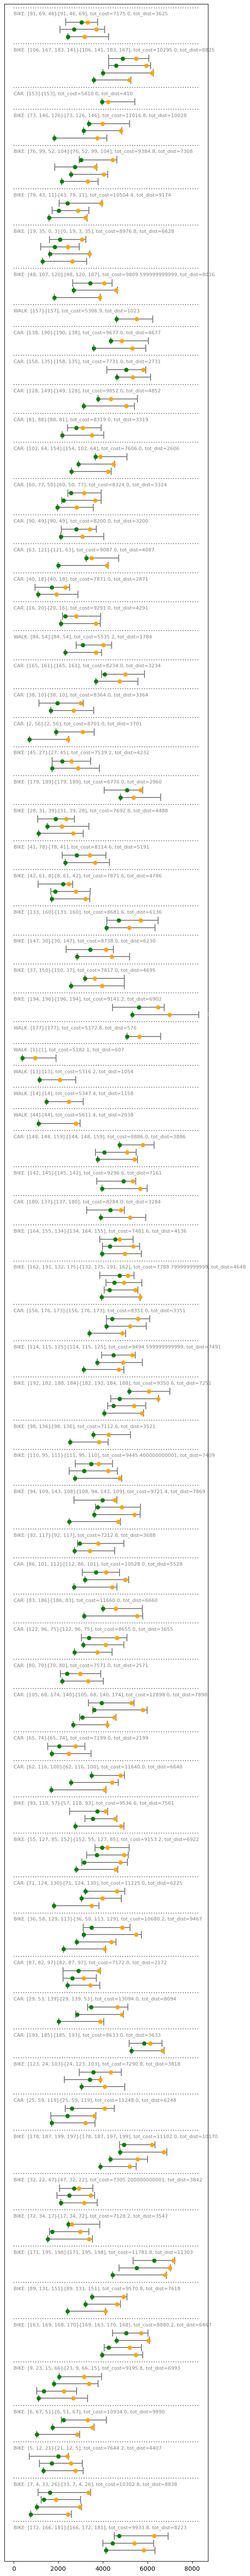

In [21]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)